#Python 科学计算——pandas 篇

参考资料：
http://ju.outofmemory.cn/entry/74953

##1*、Pandas的数据结构

In [2]:
#首先引入Pandas及Numpy：
import numpy as np
import pandas as pd

官方推荐的缩写形式为pd，你可以选择其他任意的名称。 DataFrame是二维的数据结构，其本质是Series的容器，因此，DataFrame可以包含一个索引以及与这些索引联合在一起的Series，由于一个Series中的数据类型是相同的，而不同Series的数据结构可以不同。因此对于DataFrame来说，每一列的数据结构都是相同的，而不同的列之间则可以是不同的数据结构。或者以数据库进行类比，DataFrame中的每一行是一个记录，名称为Index的一个元素，而每一列则为一个字段，是这个记录的一个属性。 创建DataFrame有多种方式：

###1.1创建Series

In [3]:
obj = pd.Series([4, 7, -5, 3])
print(obj)
type(obj)
obj

0    4
1    7
2   -5
3    3
dtype: int64


0    4
1    7
2   -5
3    3
dtype: int64

###1.2创建DataFrame

####1.2.1以字典的字典或Series的字典的结构构建DataFrame，这时候的最外面字典对应的是DataFrame的列，内嵌的字典及Series则是其中每个值。

In [6]:
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)
#df
df
print(df)
print(df.index)
print(df.columns)
print(df.dtypes)

   one  two
a  1.0  1.0
b  2.0  2.0
c  3.0  3.0
d  NaN  4.0
Index(['a', 'b', 'c', 'd'], dtype='object')
Index(['one', 'two'], dtype='object')
one    float64
two    float64
dtype: object


可以看到d是一个字典，其中one的值为Series有3个值，而two为Series有4个值。由d构建的为一个4行2列的DataFrame。其中one只有3个值，因此d行one列为NaN（Not a Number）--Pandas默认的缺失值标记。

####1.2.2从字典的列表构建DataFrame，其中每个字典代表的是每条记录（DataFrame中的一行），字典中每个值对应的是这条记录的相关属性。

In [16]:
d = [{'one' : 1,'two':1},{'one' : 2,'two' : 2},{'one' : 3,'two' : 3},{'two' : 4}]
df = pd.DataFrame(d,index=['a','b','c','d'],columns=['one','two'])
df.index.name='index'
df

,one,two
index,,
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


以上的语句与以Series的字典形式创建的DataFrame相同，只是思路略有不同，一个是以列为单位构建，将所有记录的不同属性转化为多个Series，行标签冗余，另一个是以行为单位构建，将每条记录转化为一个字典，列标签冗余。使用这种方式，如果不通过columns指定列的顺序，那么列的顺序会是随机的。

个人经验是对于从一些已经结构化的数据转化为DataFrame似乎前者更方便，而对于一些需要自己结构化的数据（比如解析Log文件，特别是针对较大数据量时），似乎后者更方便。创建了DataFrame后可以通过index.name属性为DataFrame的索引指定名称。

####1.2.3DataFrame转换为其他类型

In [11]:
df.to_dict(outtype='dict')

TypeError: to_dict() got an unexpected keyword argument 'outtype'

In [ ]:
df.to_csv('aa.csv')

In [ ]:
import os

In [ ]:
os.getcwd()

outtype的参数为‘dict’、‘list’、‘series’和‘records’。 dict返回的是dict of dict；list返回的是列表的字典；series返回的是序列的字典；records返回的是字典的列表

##2、数据文件读取

###2.1从EXCEL中读写数据：

In [115]:
#从EXCEL读入DataFrame：
df = pd.read_excel('bonus_schedule.xls')
df.head()

,Employed_After,Employed_Before,Bonus_Percent,diff,note
0,1974-01-01,1980-12-31,0.0220,7.00274,"fdsfsdf,fdsf"
1,1981-01-01,1988-12-31,0.0195,8.00274,NaN
2,1989-01-01,1998-12-31,0.0175,10.00274,NaN
3,1999-01-01,2007-12-31,0.0100,9.00274,NaN
4,2008-01-01,2008-12-31,0.0050,1.00000,NaN


In [ ]:
#将DataFrame写入EXCEL：
df.to_excel('foo1.xlsx', sheet_name='sheet1')

###2.2 从CSV中读写数据：

In [ ]:
#从CSV读入DataFrame：
df = pd.read_csv('macrodata.csv')
df.head(1)

In [ ]:
#将DataFrame写入CSV：
df.to_csv('d:/foo.csv')

##3、数据切片、筛选

###3.1数据切片

###3.1.1通过下标选取数据：

In [93]:
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [117]:
df['one']
#df.pop

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

返回df的前三行，返回的为一个Series

In [118]:
df[0:2]

,one,two
a,1.0,1
b,2.0,2


有一点需要注意的是使用起始索引名称和结束索引名称时，也会包含结束索引的数据。
使用标签选取数据：

In [50]:
#df.loc[行标签,列标签]
#df.loc['a':'b']#选取ab两行数据
#df.index.name
print(df.loc[:,'one'])#选取one列的数据
print(df.loc['a','one'])

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64
1.0


In [51]:
df.loc['a':,list(set(df.columns.values)-set(['two']))]

,one
a,1.0
b,2.0
c,3.0
d,NaN


df.loc的第一个参数是行标签，第二个参数为列标签（可选参数，默认为所有列标签），两个参数既可以是列表也可以是单个字符，如果两个参数都为列表则返回的是DataFrame，否则，则为Series。

使用位置选取数据：

In [52]:
# df.iloc[行位置,列位置]
print(df.iloc[1,1])#选取第二行，第二列的值，返回的为单个值
print(df.iloc[[0,2],:])#选取第一行及第三行的数据
print(df.iloc[0:2,:])#选取第一行到第三行（不包含）的数据
print(df.iloc[:,1])#选取所有记录的第一列的值，返回的为一个Series
print(df.iloc[1,:])#选取第一行数据，返回的为一个Series

2.0
   one  two
a  1.0    1
c  3.0    3
   one  two
a  1.0    1
b  2.0    2
a    1
b    2
c    3
d    4
Name: two, dtype: int64
one    2.0
two    2.0
Name: b, dtype: float64


PS：loc为location的缩写，iloc则为integer & location的缩写

更广义的切片方式是使用.ix，它自动根据你给到的索引类型判断是使用位置还是标签进行切片


In [53]:
print(df.ix[1,1])
print(df.ix['a':'b'])

2.0
   one  two
a  1.0    1
b  2.0    2


###3.2 数据筛选

通过逻辑指针进行数据切片：

In [119]:
#df[逻辑条件]
df[df.one >= 2]#单个逻辑条件
#df[(df.one >=1 ) & (df.one < 3) ]#多个逻辑条件组合de.

,one,two
b,2.0,2
c,3.0,3


In [96]:
df.isnull()*1

,one,two
a,0,0
b,0,0
c,0,0
d,1,0


In [110]:
df.isnull().sum()

Employed_After     0
Employed_Before    0
Bonus_Percent      0
diff               0
note               4
dtype: int64

In [120]:
df

,one,two
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


In [121]:
df.one>1

a    False
b     True
c     True
d    False
Name: one, dtype: bool

In [124]:
df[df.one>1]

,one,two
b,2.0,2
c,3.0,3


In [126]:
df[(df.one>1)*1 + (df.two>2)*1>=1]

,one,two
b,2.0,2
c,3.0,3
d,NaN,4


In [135]:
df[~((df.one>1&(df.two>1)))]

,one,two,李
d,NaN,4,NaN


In [137]:
df["李"] = df.one + df.two

In [138]:
df

,one,two,李
a,1.0,1,2.0
b,2.0,2,4.0
c,3.0,3,6.0
d,NaN,4,NaN


In [107]:
df = pd.read_excel('bonus_schedule.xls')
df.head()

,Employed_After,Employed_Before,Bonus_Percent,diff,note
0,1974-01-01,1980-12-31,0.0220,7.00274,"fdsfsdf,fdsf"
1,1981-01-01,1988-12-31,0.0195,8.00274,NaN
2,1989-01-01,1998-12-31,0.0175,10.00274,NaN
3,1999-01-01,2007-12-31,0.0100,9.00274,NaN
4,2008-01-01,2008-12-31,0.0050,1.00000,NaN


In [58]:
df[df.Bonus_Percent<0.02]

,Employed_After,Employed_Before,Bonus_Percent,diff,note
1,1981-01-01,1988-12-31,0.0195,8.00274,NaN
2,1989-01-01,1998-12-31,0.0175,10.00274,NaN
3,1999-01-01,2007-12-31,0.0100,9.00274,NaN
4,2008-01-01,2008-12-31,0.0050,1.00000,NaN


这种方式获得的数据切片都是DataFrame。

In [59]:
df[df.Bonus_Percent<0.02]['diff']

1     8.00274
2    10.00274
3     9.00274
4     1.00000
Name: diff, dtype: float64

##4、基本运算

###4.1 计算新列

In [60]:
df.head(3)

,Employed_After,Employed_Before,Bonus_Percent,diff,note
0,1974-01-01,1980-12-31,0.0220,7.00274,"fdsfsdf,fdsf"
1,1981-01-01,1988-12-31,0.0195,8.00274,NaN
2,1989-01-01,1998-12-31,0.0175,10.00274,NaN


In [61]:
df = pd.read_csv('macrodata.csv')
df.head(1)
df['qtr']=df['year']*10+df['quarter']
df.head(1)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,qtr
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.0,0.0,19591.0


###4.2Pandas支持基本的运算及向量化运算

In [62]:
df.mean()#计算列的平均值，参数为轴，可选值为0或1.默认为0，即按照列运算
#df.sum(1)#计算行的和
#df.apply(lambda x: x.max() - x.min())#将一个函数应用到DataFrame的每一列，这里使用的是匿名lambda函数，与R中apply函数类似

year         1983.876847
quarter         2.492611
realgdp      7221.171901
realcons     4825.293103
realinv      1012.863862
realgovt      663.328640
realdpi      5310.540887
cpi           105.075788
m1            667.927586
tbilrate        5.311773
unemp           5.884729
pop           239.724153
infl            3.961330
realint         1.336502
qtr         19841.261084
dtype: float64

###4.3 设置索引

In [87]:
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)
df.set_index('one')

,two
one,
1.0,1.0
2.0,2.0
3.0,3.0
NaN,4.0


###4.4重命名列

In [64]:
df.rename(columns={u'one':'1'}, inplace=True)
df

,1,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


###4.5查看最大值/最小值

In [65]:
df['two'].max

<bound method Series.max of a    1.0
b    2.0
c    3.0
d    4.0
Name: two, dtype: float64>

###4.6重设索引

In [66]:
df.reset_index(inplace=True)
df

,index,1,two
0,a,1.0,1.0
1,b,2.0,2.0
2,c,3.0,3.0
3,d,NaN,4.0


###4.7改变数据类型

In [68]:
df['1'].astype(float)

0    1.0
1    2.0
2    3.0
3    NaN
Name: 1, dtype: float64

###4.8计算Series每个值的频率

In [69]:
df['1'].value_counts() # 频数的意思

3.0    1
2.0    1
1.0    1
Name: 1, dtype: int64

###4.9字符方法

pandas提供许多向量化的字符操作，你可以在str属性中找到它们

In [70]:
s='This is an example'
s.lower()
len(s)
#s.str.lower()
#s.str.len()
#s.str.contains(pattern)

18

##5*、描述性统计

decribe方法可以计算各个列的基本描述统计值。包含计数，平均数，标准差，最大值，最小值及4分位差。

In [71]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
1,3.0,2.0,1.000000,1.0,1.50,2.0,2.50,3.0
two,4.0,2.5,1.290994,1.0,1.75,2.5,3.25,4.0


##6*、排序

DataFrame提供了多种排序方式。

In [72]:
df = pd.read_excel('bonus_schedule.xls')
df.head()
df.sort_index(axis=1, ascending=False)
df

,Employed_After,Employed_Before,Bonus_Percent,diff,note
0,1974-01-01,1980-12-31,0.0220,7.00274,"fdsfsdf,fdsf"
1,1981-01-01,1988-12-31,0.0195,8.00274,NaN
2,1989-01-01,1998-12-31,0.0175,10.00274,NaN
3,1999-01-01,2007-12-31,0.0100,9.00274,NaN
4,2008-01-01,2008-12-31,0.0050,1.00000,NaN


sort_index可以以轴的标签进行排序。axis是指用于排序的轴，可选的值有0和1，默认为0即行标签（Y轴），1为按照列标签排序。 ascending是排序方式，默认为True即降序排列。

In [74]:
print(df.sort(columns='diff'))
print(df.sort(columns=['Bonus_Percent','diff'],ascending=[0,1]))

  Employed_After  Employed_Before  Bonus_Percent      diff          note
4      2008-01-01      2008-12-31         0.0050   1.00000           NaN
0      1974-01-01      1980-12-31         0.0220   7.00274  fdsfsdf,fdsf
1      1981-01-01      1988-12-31         0.0195   8.00274           NaN
3      1999-01-01      2007-12-31         0.0100   9.00274           NaN
2      1989-01-01      1998-12-31         0.0175  10.00274           NaN
  Employed_After  Employed_Before  Bonus_Percent      diff          note
0      1974-01-01      1980-12-31         0.0220   7.00274  fdsfsdf,fdsf
1      1981-01-01      1988-12-31         0.0195   8.00274           NaN
2      1989-01-01      1998-12-31         0.0175  10.00274           NaN
3      1999-01-01      2007-12-31         0.0100   9.00274           NaN
4      2008-01-01      2008-12-31         0.0050   1.00000           NaN


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


DataFrame也提供按照指定列进行排序，可以仅指定一个列作为排序标准（以单独列名作为columns的参数），也可以进行多重排序（columns的参数为一个列名的List，列名的出现顺序决定排序中的优先级），在多重排序中ascending参数也为一个List，分别与columns中的List元素对应

##7*、绘图：散点图和直方图

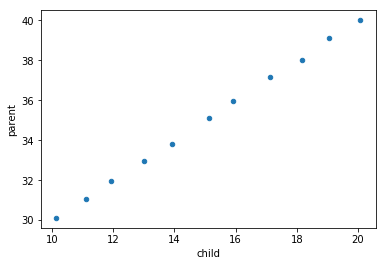

In [75]:
import pandas as pd
import numpy as np

def func(ser, factor):
    z = float(ser.max()) - float(ser.min())
    a = float(factor) * z/ 50
    return ser.apply(lambda x:x+np.random.uniform(-a, a))

df = pd.read_excel('test.xls', 'Sheet1', index_col=0)
df['child'] = func(df['child'],1)
df['parent'] = func(df['parent'],1)

import matplotlib.pyplot as plt
%matplotlib inline 

plt = df.plot(kind='scatter',x='child',y='parent').get_figure()
plt.savefig('2.jpg')
#plt.show()

In [77]:
import numpy as np
import pandas as pd

from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

In [81]:
path = 'test.xls'
df=pd.read_excel(path,'Sheet1',index_col=0)
df.columns
#df.dtypes
l = ols(formula='child~parent', data=df).fit()

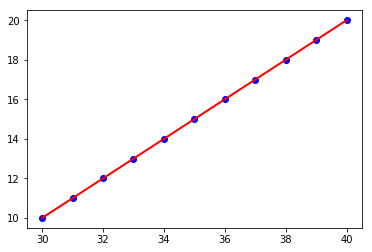

In [83]:
plt.plot(df['parent'], df['child'], 'ob')
plt.plot(df['parent'], l.fittedvalues, 'r', linewidth=2)
plt.show()